<h3>- Note that I will use the Dataset with the Risk column </h3>

<h1>Welcome to my Kernel ! </h1>

<h2>I will do some Explorations through the German Credit Risk to understand their distribuitions and patterns. </h2>

Look for another interesting Kernels on https://www.kaggle.com/kabure/kernels<br>
Give me your feedback and if yo like this kernel, <b>votes up</b>

# Tables of Content:

**1. [Introduction](#Introduction)** <br>
    - Info's about datasets
**2. [Librarys](#Librarys)** <br>
    - Importing Librarys
    - Importing Dataset
**3. [Knowning the data](#Known)** <br>
    - 3.1 Looking the Type of Data
    - 3.2 Shape of data
    - 3.3 Null Numbers
    - 3.4 Unique values
    - 3.5 The first rows of our dataset
**4. [Exploring some Variables](#Explorations)** <br>
    - 4.1 Ploting some graphical and descriptive informations
**5. [Correlation of data](#Correlation)** <br>
	- 5.1 Correlation Data
**6. [Preprocess](#Preprocessing)** <br>
	- 6.1 Importing Librarys
	- 6.2 Setting X and Y
    - 6.3 Spliting the X and Y in train and test 
**7. 1 [Model 1](#Modelling 1)** <br>
    - 7.1.1 Random Forest 
    - 7.1.2 Score values
    - 7.1.3 Cross Validation 
**7. 2 [Model 2](#Modelling 2)** <br>
    - 7.2.1 Logistic Regression 
    - 7.2.2 Score values
    - 7.2.3 Cross Validation 
    - 7.2.4 ROC Curve

<a id="Introduction"></a> <br>


# **1. Introduction:** 
<h2>Context</h2>
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

<h2>Content</h2>
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:

<b>Age </b>(numeric)<br>
<b>Sex </b>(text: male, female)<br>
<b>Job </b>(numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (text: own, rent, or free)<br>
<b>Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>Checking account </b>(numeric, in DM - Deutsch Mark)<br>
<b>Credit amount</b> (numeric, in DM)<br>
<b>Duration</b> (numeric, in month)<br>
<b>Purpose</b>(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> (Value target - Good or Bad Risk)<br>

<i>English is not my first language, so, sorry about any error</i>

<a id="Librarys"></a> <br>
# **2. Librarys:** 
- Importing Librarys
- Importing Dataset

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
df_credit = pd.read_csv("german_credit_data.csv",index_col=0)

<a id="Known"></a> <br>
# **3. First Look at the data:** 
- Looking the Type of Data
- Null Numbers
- Unique values
- The first rows of our dataset

In [2]:
#Searching for Missings,type of data and also known the shape of data
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [3]:
#Looking unique values
print(df_credit.nunique())
#Looking the data
print(df_credit.head())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64
   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


# **4. Some explorations:** <a id="Explorations"></a> <br>

- Starting by distribuition of column Age.
- Some Seaborn graphical
- Columns crossing



<h2>Let's start looking through target variable and their distribuition</h2>

In [4]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

I will try implement some interactive visuals in my Kernels, this will be the first, inspired in Alexader's Kernel and I will also continue implementing plotly and bokeh in my Kerne

In [5]:
df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



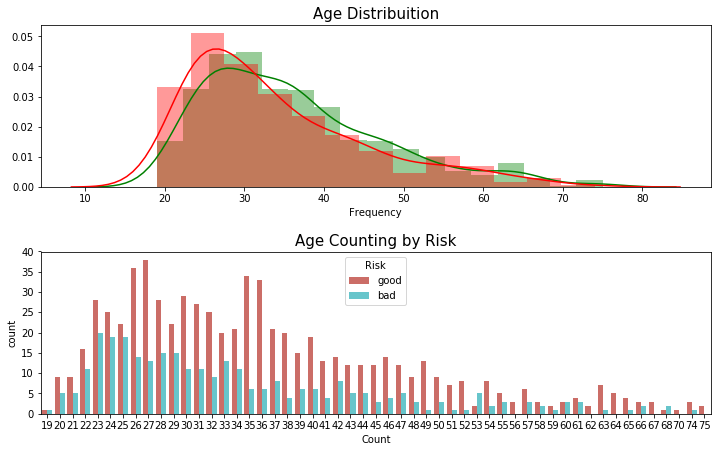

In [6]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

<h2>Creating an categorical variable to handle with the Age variable </h2>

In [7]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)


df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

In [8]:
trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

Interesting distribuition

<h2>I will now Look the distribuition of Housing own and rent by Risk</h2>


In [9]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

we can see that the own and good risk have a high correlation

<h3>Distribuition of Credit Amount by Housing</h3>

In [10]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Housing'],
            "y": df_good['Credit amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Housing'],
            "y": df_bad['Credit amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'violin/split', validate = False)

Interesting moviments! Highest values come from category "free" and we have a different distribuition by Risk

<h2>Looking the diference by Sex</h2>

In [11]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"],
    y = df_credit[df_credit["Risk"]== 'good']["Credit amount"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"],
    y = df_credit[df_credit["Risk"]== 'bad']["Credit amount"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

<b> How can I set the boxplots in different places? how can I use the same legend to both graphs?</b>

I will create categories of Age and look the distribuition of Credit Amount by Risk...


I will do some explorations through the Job
- Distribuition
- Crossed by Credit amount
- Crossed by Age

In [12]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Job"].value_counts().values,
    name='Good credit Distribuition'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Job"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Job Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [13]:
trace0 = go.Box(
    x=df_good["Job"],
    y=df_good["Credit amount"],
    name='Good credit'
)

trace1 = go.Box(
    x=df_bad['Job'],
    y=df_bad['Credit amount'],
    name='Bad credit'
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount distribuition by Job'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [14]:

fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Job'],
            "y": df_good['Age'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Job'],
            "y": df_bad['Age'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'Age-Housing', validate = False)

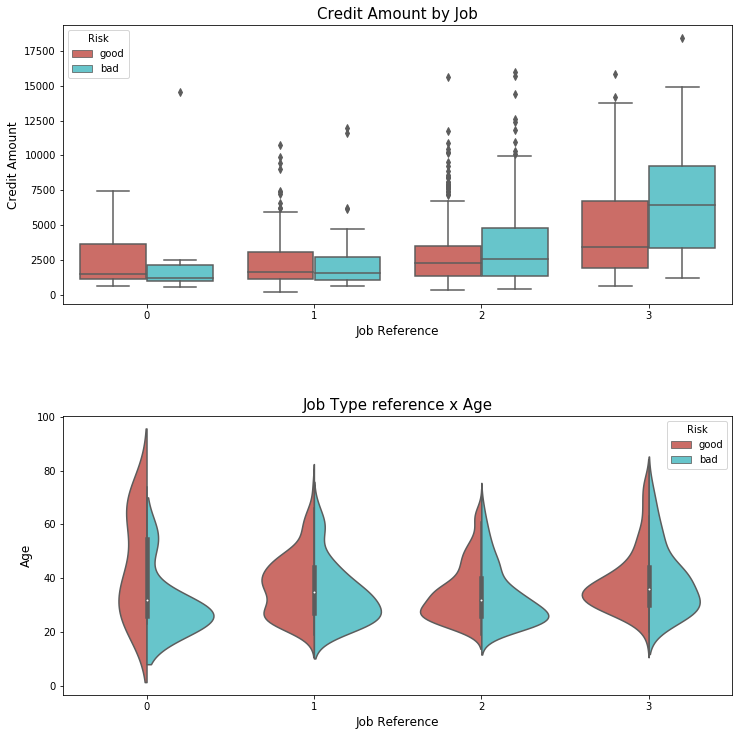

In [15]:
fig, ax = plt.subplots(figsize=(12,12), nrows=2)

g1 = sns.boxplot(x="Job", y="Credit amount", data=df_credit, 
            palette="hls", ax=ax[0], hue="Risk")
g1.set_title("Credit Amount by Job", fontsize=15)
g1.set_xlabel("Job Reference", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)

g2 = sns.violinplot(x="Job", y="Age", data=df_credit, ax=ax[1],  
               hue="Risk", split=True, palette="hls")
g2.set_title("Job Type reference x Age", fontsize=15)
g2.set_xlabel("Job Reference", fontsize=12)
g2.set_ylabel("Age", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


Looking the distribuition of Credit Amont

In [16]:
import plotly.figure_factory as ff

import numpy as np

# Add histogram data
x1 = np.log(df_good['Credit amount']) 
x2 = np.log(df_bad["Credit amount"])

# Group data together
hist_data = [x1, x2]

group_labels = ['Good Credit', 'Bad Credit']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

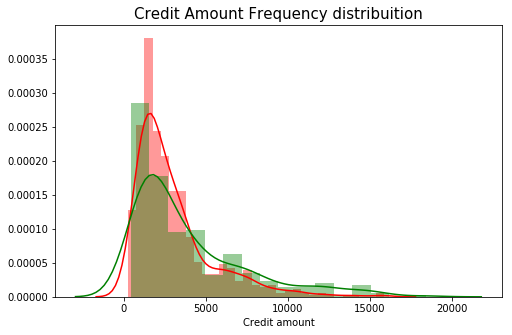

In [17]:
#Ploting the good and bad dataframes in distplot
plt.figure(figsize = (8,5))

g= sns.distplot(df_good['Credit amount'], color='r')
g = sns.distplot(df_bad["Credit amount"], color='g')
g.set_title("Credit Amount Frequency distribuition", fontsize=15)
plt.show()

Distruibution of Saving accounts by Risk

In [18]:
from plotly import tools
import numpy as np
import plotly.graph_objs as go

count_good = go.Bar(
    x = df_good["Saving accounts"].value_counts().index.values,
    y = df_good["Saving accounts"].value_counts().values,
    name='Good credit'
)
count_bad = go.Bar(
    x = df_bad["Saving accounts"].value_counts().index.values,
    y = df_bad["Saving accounts"].value_counts().values,
    name='Bad credit'
)


box_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Credit amount"],
    name='Good credit'
)
box_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Credit amount"],
    name='Bad credit'
)

scat_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Age"],
    name='Good credit'
)
scat_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Age"],
    name='Bad credit'
)

data = [scat_1, scat_2, box_1, box_2, count_good, count_bad]

fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Count Saving Accounts','Credit Amount by Savings Acc', 
                                          'Age by Saving accounts'))

fig.append_trace(count_good, 1, 1)
fig.append_trace(count_bad, 1, 1)

fig.append_trace(box_2, 1, 2)
fig.append_trace(box_1, 1, 2)

fig.append_trace(scat_1, 2, 1)
fig.append_trace(scat_2, 2, 1)



fig['layout'].update(height=700, width=800, title='Saving Accounts Exploration', boxmode='group')

py.iplot(fig, filename='combined-savings')


How can I better configure the legends?  I am trying to substitute the graph below, so how can I use the violinplot on subplots of plotly?

Description of Distribuition Saving accounts by Risk:  
Risk             bad  good
Saving accounts           
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42


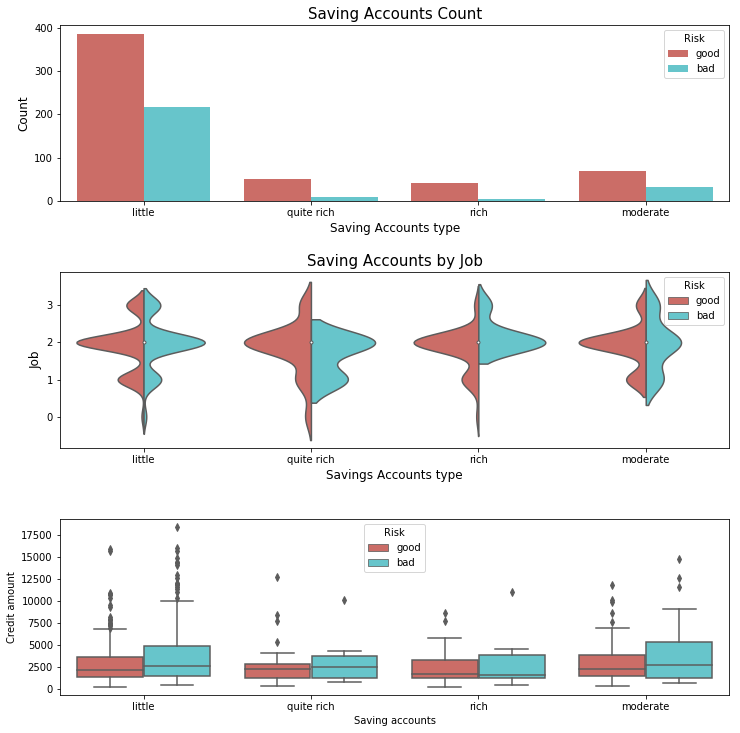

In [19]:
print("Description of Distribuition Saving accounts by Risk:  ")
print(pd.crosstab(df_credit["Saving accounts"],df_credit.Risk))

fig, ax = plt.subplots(3,1, figsize=(12,12))
g = sns.countplot(x="Saving accounts", data=df_credit, palette="hls", 
              ax=ax[0],hue="Risk")
g.set_title("Saving Accounts Count", fontsize=15)
g.set_xlabel("Saving Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)

g1 = sns.violinplot(x="Saving accounts", y="Job", data=df_credit, palette="hls", 
               hue = "Risk", ax=ax[1],split=True)
g1.set_title("Saving Accounts by Job", fontsize=15)
g1.set_xlabel("Savings Accounts type", fontsize=12)
g1.set_ylabel("Job", fontsize=12)

g = sns.boxplot(x="Saving accounts", y="Credit amount", data=df_credit, ax=ax[2],
            hue = "Risk",palette="hls")
g2.set_title("Saving Accounts by Credit Amount", fontsize=15)
g2.set_xlabel("Savings Accounts type", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


Pretty and interesting distribution...

Values describe: 
Risk                 bad  good
Purpose                       
business              34    63
car                  106   231
domestic appliances    4     8
education             23    36
furniture/equipment   58   123
radio/TV              62   218
repairs                8    14
vacation/others        5     7


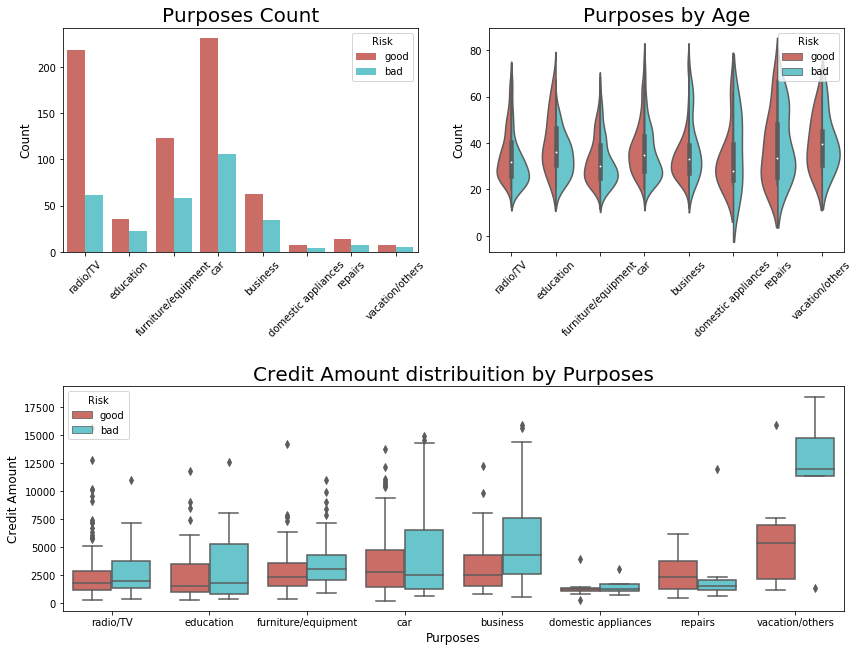

In [20]:
print("Values describe: ")
print(pd.crosstab(df_credit.Purpose, df_credit.Risk))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=df_credit, 
              palette="hls", hue = "Risk")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="Purpose", y="Age", data=df_credit, 
                    palette="hls", hue = "Risk",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="Purpose", y="Credit amount", data=df_credit, 
               palette="hls", hue = "Risk")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

Duration of the loans distribuition and density

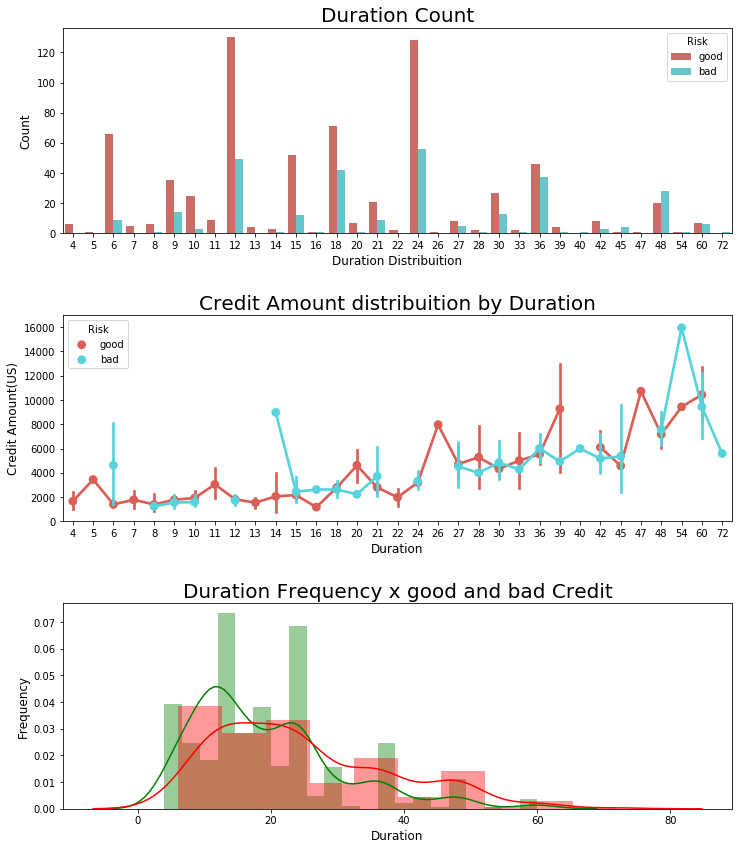

In [21]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Duration", data=df_credit, 
              palette="hls",  hue = "Risk")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Duration", y ="Credit amount",data=df_credit,
                   hue="Risk", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(df_good["Duration"], color='g')
g2 = sns.distplot(df_bad["Duration"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()


Interesting, we can see that the highest duration have the high amounts. <br>
The highest density is between [12 ~ 18 ~ 24] months<br>
It all make sense.


<h2> Checking Account variable </h2>

First, let's look the distribuition 

In [22]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Checking account"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Checking account"].value_counts().values,
    name='Good credit Distribuition' 
    
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Checking account"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Checking account"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Checking accounts Distribuition',
    xaxis=dict(title='Checking accounts name'),
    yaxis=dict(title='Count'),
    barmode='group'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename = 'Age-ba', validate = False)

Now, we will verify the values through Checking Accounts

In [23]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Checking account"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Checking account'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Cheking distribuition'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

The old plot that I am trying to substitute with interactive plots

Total values of the most missing variable: 
Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


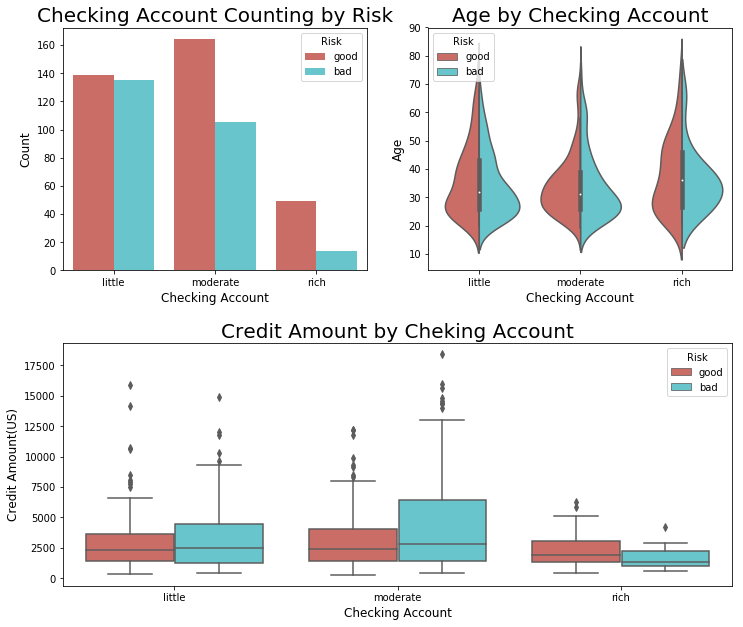

In [24]:
print("Total values of the most missing variable: ")
print(df_credit.groupby("Checking account")["Checking account"].count())

plt.figure(figsize = (12,10))

g = plt.subplot(221)
g = sns.countplot(x="Checking account", data=df_credit, 
              palette="hls", hue="Risk")
g.set_xlabel("Checking Account", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Checking Account Counting by Risk", fontsize=20)

g1 = plt.subplot(222)
g1 = sns.violinplot(x="Checking account", y="Age", data=df_credit, palette="hls", hue = "Risk",split=True)
g1.set_xlabel("Checking Account", fontsize=12)
g1.set_ylabel("Age", fontsize=12)
g1.set_title("Age by Checking Account", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="Checking account",y="Credit amount", data=df_credit,hue='Risk',palette="hls")
g2.set_xlabel("Checking Account", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)
g2.set_title("Credit Amount by Cheking Account", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

plt.show()
plt.show()

Crosstab session and anothers to explore our data by another metrics a little deep

In [25]:
print(pd.crosstab(df_credit.Sex, df_credit.Job))

Job      0    1    2    3
Sex                      
female  12   64  197   37
male    10  136  433  111


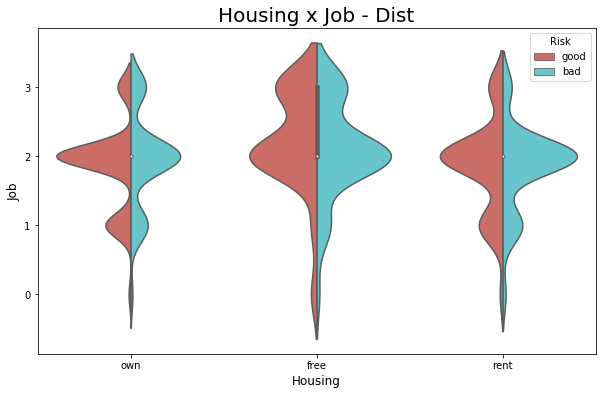

In [26]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Housing",y="Job",data=df_credit,
                   hue="Risk", palette="hls",split=True)
g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Job", fontsize=12)
g.set_title("Housing x Job - Dist", fontsize=20)

plt.show()

In [27]:
print(pd.crosstab(df_credit["Checking account"],df_credit.Sex))

Sex               female  male
Checking account              
little                88   186
moderate              86   183
rich                  20    43


In [28]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [29]:
date_int = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_credit[date_int[0]], df_credit[date_int[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


## Looking the total of values in each categorical feature

In [30]:
print("Purpose : ",df_credit.Purpose.unique())
print("Sex : ",df_credit.Sex.unique())
print("Housing : ",df_credit.Housing.unique())
print("Saving accounts : ",df_credit['Saving accounts'].unique())
print("Risk : ",df_credit['Risk'].unique())
print("Checking account : ",df_credit['Checking account'].unique())
print("Aget_cat : ",df_credit['Age_cat'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' nan 'rich']
Aget_cat :  [Senior, Student, Adult, Young]
Categories (4, object): [Student < Young < Adult < Senior]


## Let's do some feature engineering on this values and create variable Dummies of the values

In [31]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

## Transforming the data into Dummy variables

In [32]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

## Deleting the old features

In [33]:
#Excluding the missing columns
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit['Risk_good']

# **5. Correlation:** <a id="Correlation"></a> <br>
- Looking the data correlation
<h1>Looking the correlation of the data

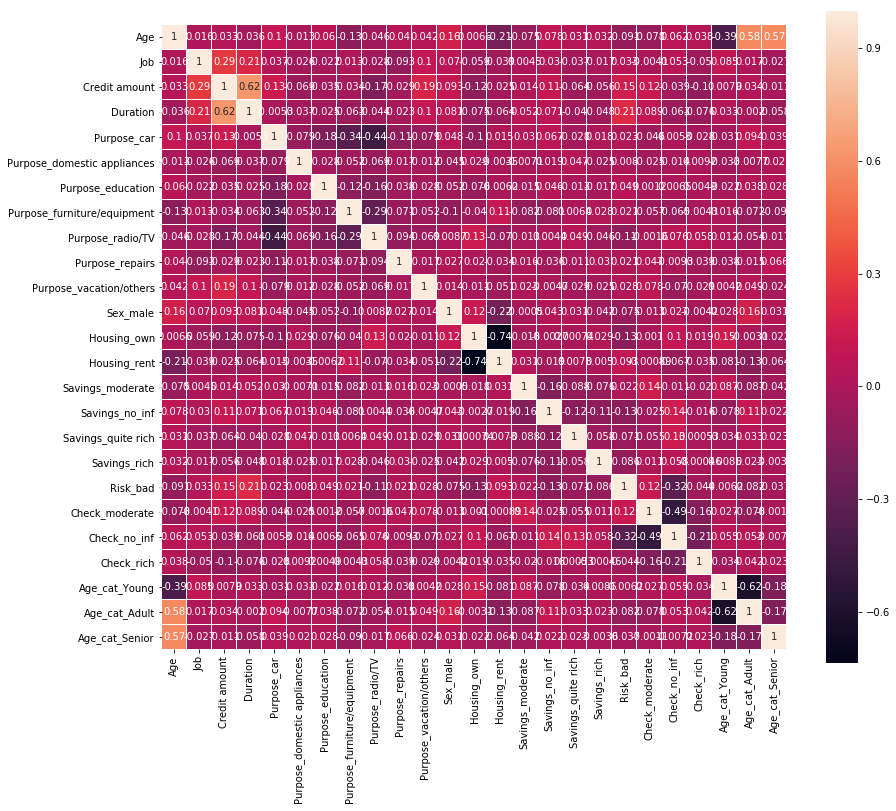

In [34]:
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

# **6. Preprocessing:** <a id="Preprocessing"></a> <br>
- Importing ML librarys
- Setting X and y variables to the prediction
- Splitting Data


In [35]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [36]:
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])

In [37]:
#Creating the X and y variables
X = df_credit.drop('Risk_bad', 1).values
y = df_credit["Risk_bad"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logis

LR: 0.387574 (0.077970)
LDA: 0.428815 (0.093162)
KNN: 0.263130 (0.035560)
CART: 0.530683 (0.097582)
NB: 0.596300 (0.081365)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

RF: 0.286045 (0.067512)
SVM: 0.182230 (0.088462)


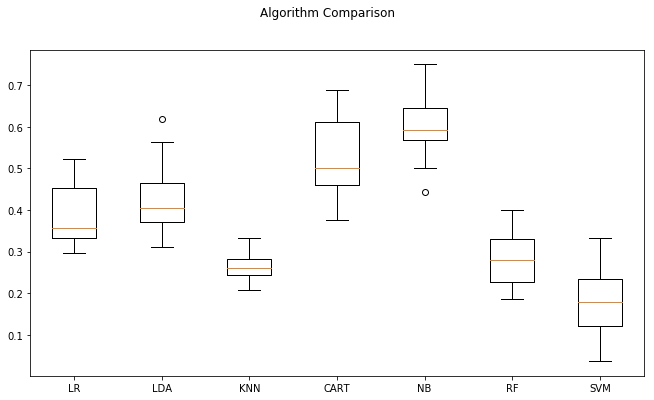

In [38]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Very interesting. Almost all models shows a low value to recall. 

We can observe that our best results was with CART, NB and XGBoost. <br>
I will implement some models and try to do a simple Tunning on them

# **7.1 Model 1 :** <a id="Modelling 1"></a> <br>
- Using Random Forest to predictict the credit score 
- Some of Validation Parameters

In [39]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.08695652173913043, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.10869565217391304, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.08695652173913043, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.15555555555555556, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.08888888888888889, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.13043478260869565, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.1111111111111111, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.08888888888888889, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=10 ....................
[CV]  max_depth=3, max_features=4, n_estimators=10, score=0.043478260869565216, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=10 ....................
[CV]  max_depth=3, max_features=4, n_estimators=10, score=0.10869565217391304, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=10 ....................
[CV]  max_depth=3, max_features=4, n_estimators=10, score=0.08695652173913043, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=10 ....................
[CV]  max_depth=3, 

[CV]  max_depth=3, max_features=7, n_estimators=150, score=0.13333333333333333, total=   0.4s
[CV] max_depth=3, max_features=7, n_estimators=150 ...................
[CV]  max_depth=3, max_features=7, n_estimators=150, score=0.08888888888888889, total=   0.4s
[CV] max_depth=3, max_features=15, n_estimators=3 ....................
[CV]  max_depth=3, max_features=15, n_estimators=3, score=0.1956521739130435, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=3 ....................
[CV]  max_depth=3, max_features=15, n_estimators=3, score=0.2608695652173913, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=3 ....................
[CV]  max_depth=3, max_features=15, n_estimators=3, score=0.30434782608695654, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=3 ....................
[CV]  max_depth=3, max_features=15, n_estimators=3, score=0.13333333333333333, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=3 ....................
[CV]  max_depth=

[CV]  max_depth=3, max_features=20, n_estimators=25, score=0.2222222222222222, total=   0.1s
[CV] max_depth=3, max_features=20, n_estimators=50 ...................
[CV]  max_depth=3, max_features=20, n_estimators=50, score=0.17391304347826086, total=   0.1s
[CV] max_depth=3, max_features=20, n_estimators=50 ...................
[CV]  max_depth=3, max_features=20, n_estimators=50, score=0.3695652173913043, total=   0.1s
[CV] max_depth=3, max_features=20, n_estimators=50 ...................
[CV]  max_depth=3, max_features=20, n_estimators=50, score=0.21739130434782608, total=   0.1s
[CV] max_depth=3, max_features=20, n_estimators=50 ...................
[CV]  max_depth=3, max_features=20, n_estimators=50, score=0.24444444444444444, total=   0.2s
[CV] max_depth=3, max_features=20, n_estimators=50 ...................
[CV]  max_depth=3, max_features=20, n_estimators=50, score=0.26666666666666666, total=   0.2s
[CV] max_depth=3, max_features=20, n_estimators=150 ..................
[CV]  max_de

[CV]  max_depth=5, max_features=7, n_estimators=10, score=0.2391304347826087, total=   0.0s
[CV] max_depth=5, max_features=7, n_estimators=10 ....................
[CV]  max_depth=5, max_features=7, n_estimators=10, score=0.391304347826087, total=   0.0s
[CV] max_depth=5, max_features=7, n_estimators=10 ....................
[CV]  max_depth=5, max_features=7, n_estimators=10, score=0.2826086956521739, total=   0.1s
[CV] max_depth=5, max_features=7, n_estimators=10 ....................
[CV]  max_depth=5, max_features=7, n_estimators=10, score=0.2222222222222222, total=   0.0s
[CV] max_depth=5, max_features=7, n_estimators=10 ....................
[CV]  max_depth=5, max_features=7, n_estimators=10, score=0.2222222222222222, total=   0.1s
[CV] max_depth=5, max_features=7, n_estimators=25 ....................
[CV]  max_depth=5, max_features=7, n_estimators=25, score=0.21739130434782608, total=   0.0s
[CV] max_depth=5, max_features=7, n_estimators=25 ....................
[CV]  max_depth=5, max

[CV]  max_depth=5, max_features=20, n_estimators=10, score=0.2608695652173913, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=10 ...................
[CV]  max_depth=5, max_features=20, n_estimators=10, score=0.45652173913043476, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=10 ...................
[CV]  max_depth=5, max_features=20, n_estimators=10, score=0.30434782608695654, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=10 ...................
[CV]  max_depth=5, max_features=20, n_estimators=10, score=0.3111111111111111, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=10 ...................
[CV]  max_depth=5, max_features=20, n_estimators=10, score=0.4, total=   0.0s
[CV] max_depth=5, max_features=20, n_estimators=25 ...................
[CV]  max_depth=5, max_features=20, n_estimators=25, score=0.2608695652173913, total=   0.1s
[CV] max_depth=5, max_features=20, n_estimators=25 ...................
[CV]  max_depth=5, max_featur

[CV]  max_depth=7, max_features=7, n_estimators=10, score=0.34782608695652173, total=   0.0s
[CV] max_depth=7, max_features=7, n_estimators=10 ....................
[CV]  max_depth=7, max_features=7, n_estimators=10, score=0.3333333333333333, total=   0.0s
[CV] max_depth=7, max_features=7, n_estimators=10 ....................
[CV]  max_depth=7, max_features=7, n_estimators=10, score=0.4444444444444444, total=   0.0s
[CV] max_depth=7, max_features=7, n_estimators=25 ....................
[CV]  max_depth=7, max_features=7, n_estimators=25, score=0.2826086956521739, total=   0.1s
[CV] max_depth=7, max_features=7, n_estimators=25 ....................
[CV]  max_depth=7, max_features=7, n_estimators=25, score=0.41304347826086957, total=   0.1s
[CV] max_depth=7, max_features=7, n_estimators=25 ....................
[CV]  max_depth=7, max_features=7, n_estimators=25, score=0.41304347826086957, total=   0.1s
[CV] max_depth=7, max_features=7, n_estimators=25 ....................
[CV]  max_depth=7, 

[CV]  max_depth=7, max_features=20, n_estimators=5, score=0.4444444444444444, total=   0.0s
[CV] max_depth=7, max_features=20, n_estimators=10 ...................
[CV]  max_depth=7, max_features=20, n_estimators=10, score=0.32608695652173914, total=   0.0s
[CV] max_depth=7, max_features=20, n_estimators=10 ...................
[CV]  max_depth=7, max_features=20, n_estimators=10, score=0.3695652173913043, total=   0.0s
[CV] max_depth=7, max_features=20, n_estimators=10 ...................
[CV]  max_depth=7, max_features=20, n_estimators=10, score=0.43478260869565216, total=   0.0s
[CV] max_depth=7, max_features=20, n_estimators=10 ...................
[CV]  max_depth=7, max_features=20, n_estimators=10, score=0.3333333333333333, total=   0.0s
[CV] max_depth=7, max_features=20, n_estimators=10 ...................
[CV]  max_depth=7, max_features=20, n_estimators=10, score=0.5111111111111111, total=   0.0s
[CV] max_depth=7, max_features=20, n_estimators=25 ...................
[CV]  max_depth

[CV]  max_depth=10, max_features=4, n_estimators=150, score=0.35555555555555557, total=   0.5s
[CV] max_depth=10, max_features=7, n_estimators=3 ....................
[CV]  max_depth=10, max_features=7, n_estimators=3, score=0.2608695652173913, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=3 ....................
[CV]  max_depth=10, max_features=7, n_estimators=3, score=0.391304347826087, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=3 ....................
[CV]  max_depth=10, max_features=7, n_estimators=3, score=0.391304347826087, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=3 ....................
[CV]  max_depth=10, max_features=7, n_estimators=3, score=0.3111111111111111, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=3 ....................
[CV]  max_depth=10, max_features=7, n_estimators=3, score=0.4888888888888889, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=5 ....................
[CV]  max_depth=10, m

[CV]  max_depth=10, max_features=15, n_estimators=50, score=0.32608695652173914, total=   0.3s
[CV] max_depth=10, max_features=15, n_estimators=50 ..................
[CV]  max_depth=10, max_features=15, n_estimators=50, score=0.4782608695652174, total=   0.1s
[CV] max_depth=10, max_features=15, n_estimators=50 ..................
[CV]  max_depth=10, max_features=15, n_estimators=50, score=0.5, total=   0.1s
[CV] max_depth=10, max_features=15, n_estimators=50 ..................
[CV]  max_depth=10, max_features=15, n_estimators=50, score=0.3333333333333333, total=   0.1s
[CV] max_depth=10, max_features=15, n_estimators=50 ..................
[CV]  max_depth=10, max_features=15, n_estimators=50, score=0.5333333333333333, total=   0.2s
[CV] max_depth=10, max_features=15, n_estimators=150 .................
[CV]  max_depth=10, max_features=15, n_estimators=150, score=0.32608695652173914, total=   0.4s
[CV] max_depth=10, max_features=15, n_estimators=150 .................
[CV]  max_depth=10, ma

[CV]  max_depth=None, max_features=4, n_estimators=10, score=0.3695652173913043, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=10 .................
[CV]  max_depth=None, max_features=4, n_estimators=10, score=0.43478260869565216, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=10 .................
[CV]  max_depth=None, max_features=4, n_estimators=10, score=0.28888888888888886, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=10 .................
[CV]  max_depth=None, max_features=4, n_estimators=10, score=0.35555555555555557, total=   0.0s
[CV] max_depth=None, max_features=4, n_estimators=25 .................
[CV]  max_depth=None, max_features=4, n_estimators=25, score=0.34782608695652173, total=   0.1s
[CV] max_depth=None, max_features=4, n_estimators=25 .................
[CV]  max_depth=None, max_features=4, n_estimators=25, score=0.391304347826087, total=   0.1s
[CV] max_depth=None, max_features=4, n_estimators=25 .................
[

[CV]  max_depth=None, max_features=15, n_estimators=5, score=0.4, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=5 .................
[CV]  max_depth=None, max_features=15, n_estimators=5, score=0.4888888888888889, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=10 ................
[CV]  max_depth=None, max_features=15, n_estimators=10, score=0.34782608695652173, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=10 ................
[CV]  max_depth=None, max_features=15, n_estimators=10, score=0.34782608695652173, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=10 ................
[CV]  max_depth=None, max_features=15, n_estimators=10, score=0.4782608695652174, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=10 ................
[CV]  max_depth=None, max_features=15, n_estimators=10, score=0.3333333333333333, total=   0.0s
[CV] max_depth=None, max_features=15, n_estimators=10 ................
[CV]  max_dep

[CV]  max_depth=None, max_features=20, n_estimators=150, score=0.37777777777777777, total=   0.5s
[CV] max_depth=None, max_features=20, n_estimators=150 ...............
[CV]  max_depth=None, max_features=20, n_estimators=150, score=0.5111111111111111, total=   0.5s


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  1.2min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 7, 10, None], 'n_estimators': [3, 5, 10, 25, 50, 150], 'max_features': [4, 7, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=4)

In [40]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.49111239935587764
{'max_depth': None, 'max_features': 20, 'n_estimators': 5}


In [41]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [42]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.736


[[158  20]
 [ 46  26]]


0.3892215568862275


Very sucks results! How can I increase my model? 

# **7.2 Model 2:** <a id="Modelling 2"></a> <br>

In [43]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [44]:
# Criando o classificador logreg
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

In [45]:
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))

Training score data: 
0.7053333333333334


In [46]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.648


[[124  54]
 [ 34  38]]


              precision    recall  f1-score   support

           0       0.78      0.70      0.74       178
           1       0.41      0.53      0.46        72

   micro avg       0.65      0.65      0.65       250
   macro avg       0.60      0.61      0.60       250
weighted avg       0.68      0.65      0.66       250



With the Gaussian Model we got a best recall. 

## Let's verify the ROC curve

AUC score is :  0.6598782771535581


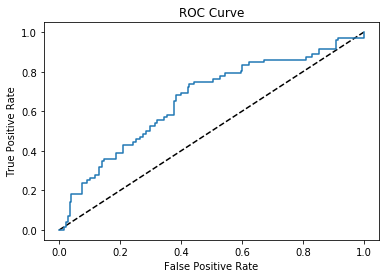

In [47]:
from sklearn.metrics import roc_auc_score
#Predicting proba
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print("AUC score is : ", roc_auc_score(y_test, y_pred_prob))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Anti-classification

In [68]:
import copy
def test_anti_classification(model, X, col_idx, threshold):
    y_pred = model.predict(X)
    
    # change column Value
    # gender
    if len(col_idx) == 1:
        idx = col_idx[0]
        X_copy = copy.deepcopy(X)
        X_copy[:,idx] = 1 - X_copy[:,idx]
    # age
    elif len(col_idx) == 3:
        X_copy = copy.deepcopy(X)
        X_copy[:, col_idx[0]] = 1 - X_copy[:, col_idx[0]]
        X_copy[:, col_idx[1]] = 1 - X_copy[:, col_idx[1]]
        
    y_pred_copy = model.predict(X_copy)
    
    inconsistency = np.sum(y_pred[y_pred != y_pred_copy])
    print("Counts of inconsistent results : ", inconsistency)
    
    if inconsistency / len(X) > threshold:
        print("Failed anti-classification")
    else:
        print("Passed anti-classification")
        
feat_map = {df_credit.columns[i] : i for i in range(len(df_credit.columns))}
print(feat_map)
test_anti_classification(model, X, [feat_map["Age_cat_Young"]-1, feat_map["Age_cat_Adult"]-1, feat_map["Age_cat_Senior"]-1], 0.2)
test_anti_classification(model, X, [feat_map["Sex_male"]], 0.2)

{'Age': 0, 'Job': 1, 'Credit amount': 2, 'Duration': 3, 'Purpose_car': 4, 'Purpose_domestic appliances': 5, 'Purpose_education': 6, 'Purpose_furniture/equipment': 7, 'Purpose_radio/TV': 8, 'Purpose_repairs': 9, 'Purpose_vacation/others': 10, 'Sex_male': 11, 'Housing_own': 12, 'Housing_rent': 13, 'Savings_moderate': 14, 'Savings_no_inf': 15, 'Savings_quite rich': 16, 'Savings_rich': 17, 'Risk_bad': 18, 'Check_moderate': 19, 'Check_no_inf': 20, 'Check_rich': 21, 'Age_cat_Young': 22, 'Age_cat_Adult': 23, 'Age_cat_Senior': 24}
Counts of inconsistent results :  39
Passed anti-classification
Counts of inconsistent results :  22
Passed anti-classification


In [110]:
X_new = df_credit.drop(['Risk_bad'], axis=1).values
X_new[:,11] = 0
X_new[:,21] = 0
X_new[:,22] = 0
X_new[:,23] = 0
print(X_new.shape)

# Spliting X and y into train and test version
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.25, random_state=42)

# Criando o classificador logreg
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train_new, y_train)

# Printing the Training Score
print("Training score data: ")
print(model.score(X_train_new, y_train))

test_anti_classification(model, X_new, [feat_map["Age_cat_Young"]-1, feat_map["Age_cat_Adult"]-1, feat_map["Age_cat_Senior"]-1], 0.2)
test_anti_classification(model, X_new, [feat_map["Sex_male"]], 0.2)

(1000, 24)
Training score data: 
0.7106666666666667
Counts of inconsistent results :  0
Passed anti-classification
Counts of inconsistent results :  0
Passed anti-classification


# Independence

In [84]:
def test_independence(model, X, col_name, threshold):
    if col_name == "Age":
        X_copy = copy.deepcopy(X)
        x1 = X_copy[X_copy[:,21] == 1]
        x2 = X_copy[X_copy[:,22] == 1]
        x3 = X_copy[X_copy[:,23] == 1]
        
        y1 = model.predict(x1)
        y2 = model.predict(x2)
        y3 = model.predict(x3)
        
        p1 = np.sum(y1) / len(x1)
        p2 = np.sum(y2) / len(x2)
        p3 = np.sum(y3) / len(x3)
        
        diff = p1 / p2
        if diff > 1 : 
            diff = 1 / diff
        print(p1, p2, p3, diff)
        if diff > threshold:
            print("Passed independence test")
        else:
            print("Failed independence test")
    elif col_name == "Gender":
        X_copy = copy.deepcopy(X)
        x1 = X_copy[X_copy[:,11] == 1]
        x2 = X_copy[X_copy[:,11] == 0]
        
        y1 = model.predict(x1)
        y2 = model.predict(x2)
        
        p1 = np.sum(y1) / len(x1)
        p2 = np.sum(y2) / len(x2)
        
        diff = p1 / p2
        print(p1, p2, diff)
        if diff > threshold:
            print("Passed independence test")
        else:
            print("Failed independence test")
test_independence(model, X, "Age", 0.8)
test_independence(model, X, "Gender", 0.8)

0.4020100502512563 0.2997275204359673 0.0 0.7455722070844686
Failed independence test
0.33043478260869563 0.46774193548387094 0.7064467766116942
Failed independence test


In [142]:
import math
X_new_gender = df_credit.drop(['Risk_bad'], axis=1).values
Y_copy_gender = copy.deepcopy(y)
male_ct = sum(X_new_gender[:,11])
female_ct = 1000 - male_ct

def get_gender_metric(X_new_gender, y):
    male_risk = 0
    female_risk = 0

    for i in range(X_new_gender.shape[0]):
        if X_new_gender[:,11][i] == 1.0 and y[i] == 1.0:
            male_risk +=1
    female_risk = sum(y) - male_risk
    return female_risk, male_risk

female_risk, male_risk = get_gender_metric(X_new_gender, y)


female_risk_rate = female_risk/female_ct
male_risk_rate = male_risk/male_ct
print(female_risk_rate)
print(male_risk_rate)

# to achive the desired value, we want to add some duplicate columns

female_add = None
for i in range(1000):
    if X_new_gender[:,11][i] == 0.0 and y[i] == 0.0:
        female_add=X_new_gender[i]
        break
numToAdd = math.ceil(female_risk/male_risk_rate - female_ct)
for i in range(numToAdd):
    X_new_gender = np.r_[X_new_gender, [female_add]]
    Y_copy_gender = np.r_[Y_copy_gender, [0.0]]
     
female_risk, male_risk = get_gender_metric(X_new_gender, Y_copy_gender)

female_risk_rate = female_risk/(female_ct+numToAdd)
male_risk_rate = male_risk/male_ct
print("Modified rate")
print(female_risk_rate)
print(male_risk_rate)

0.35161290322580646
0.2768115942028985
Modified rate
0.2766497461928934
0.2768115942028985


In [143]:
def get_age_metric(X, Y):
    young_ct = 0
    young_risk = 0
    adult_ct = 0
    adult_risk = 0
    senior_ct = 0
    senior_risk = 0

    for i in range(X.shape[0]):
        if X[:,21][i] == 1.0:
            young_ct +=1
            if Y[i] == 1.0:
                young_risk += 1
        if X[:,22][i] == 1.0:
            adult_ct +=1
            if Y[i] == 1.0:
                adult_risk += 1
        if X[:,23][i] == 1.0:
            senior_ct +=1
            if Y[i] == 1.0:
                senior_risk += 1
    return  young_ct, young_risk, adult_ct, adult_risk, senior_ct, senior_risk
    
yct, yr,act, ar, sct, sr = get_age_metric(X_new_gender, Y_copy_gender);

print("original age risk rate")
print(yct/yr)
print(act/ar)
print(sct/sr)


na = math.ceil(ar/yr - act)
ns = math.ceil(sr/yr - sct)

aa = []
sa = []
for i in range(X_new_gender.shape[0]):
    if X_new_gender[:,22][i] == 1.0 and y[i] == 0.0:
        aa.append(X_new_gender[i])
        break
        
for i in range(X_new_gender.shape[0]):
    if X_new_gender[:,23][i] == 1.0 and y[i] == 0.0:
        sa.append(X_new_gender[i])
        break
        
#balance gender
naa = copy.deepcopy(aa[0])
aa[0][11] = 0.0
naa[11] = 1.0
aa.append(naa)

nsa = copy.deepcopy(sa[0])
sa[0][11] = 0.0
nsa[11] = 1.0
sa.append(nsa)

for i in range(na//2):
    X_new_gender = np.r_[X_new_gender, aa]
    Y_copy_gender = np.r_[Y_copy_gender, [0.0]]

for i in range(ns//2):
    X_new_gender = np.r_[X_new_gender, sa]
    Y_copy_gender = np.r_[Y_copy_gender, [0.0]]
    
yct, yr,act, ar, sct, sr = get_age_metric(X_new_gender, Y_copy_gender);

print("modified age risk rate")
print(yct/yr)
print(act/ar)
print(sct/sr)


X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_gender, Y_copy_gender, test_size = 0.25, random_state=42)
GNB = GaussianNB()
model = GNB.fit(X_train_new, y_train_new)
print("Training score data: ")
print(model.score(X_train_new, y_train_new))
print("independence enhanced")

test_independence(model, X, "Gender", 0.8)
test_independence(model, X, "Age", 0.8)

original age risk rate
3.3728813559322033
3.989130434782609
4.5
modified age risk rate
3.3728813559322033
3.989130434782609
4.5
Training score data: 
0.7293972939729397
independence enhanced
0.3 0.34516129032258064 0.8691588785046729
Passed independence test
0.3341708542713568 0.2724795640326976 0.0 0.8153899735715311
Passed independence test


# Separation

In [135]:
def test_separation(model, X, y, col_name, threshold):
    if col_name == "Age":
        X_copy = copy.deepcopy(X)
        x1 = X_copy[X_copy[:,21] == 1]
        x2 = X_copy[X_copy[:,22] == 1]
        x3 = X_copy[X_copy[:,23] == 1]
        
        y1_true = y[X_copy[:,21] == 1]
        y2_true = y[X_copy[:,22] == 1]
        y3_true = y[X_copy[:,23] == 1]
        
        y1 = model.predict(x1)
        y2 = model.predict(x2)
        y3 = model.predict(x3)
        
        c1, c2, c3 = confusion_matrix(y1, y1_true) / len(y1), confusion_matrix(y2, y2_true) / len(y2), confusion_matrix(y3, y3_true) / len(y3)
        print(c1)
        print(c2)
        print(c3)
        print("------------------------------")
        diff = c1 / c2
        if diff[0, 1] > 1:
            diff[0, 1] = 1 / diff[0, 1]
        if diff[1, 0] > 1:
            diff[1, 0] = 1 / diff[1, 0]
        mean_diff = (diff[0,1] + diff[1,0]) / 2
        print(mean_diff)
        if mean_diff > threshold:
            print("Passed the separation")
        else:
            print("Failed the separation test")
    elif col_name == "Gender":
        X_copy = copy.deepcopy(X)
        x1 = X_copy[X_copy[:,11] == 1]
        x2 = X_copy[X_copy[:,11] == 0]
        
        y1 = model.predict(x1)
        y2 = model.predict(x2)
        
        y1_true = y[X_copy[:,11] == 1]
        y2_true = y[X_copy[:,11] == 0]
        
        c1, c2 = confusion_matrix(y1, y1_true) / len(y1), confusion_matrix(y2, y2_true) / len(y2)
        print(c1)
        print(c2)
        diff = c1 / c2
        if diff[0, 1] > 1:
            diff[0, 1] = 1 / diff[0, 1]
        if diff[1, 0] > 1:
            diff[1, 0] = 1 / diff[1, 0]
        mean_diff = (diff[0,1] + diff[1,0]) / 2
        print(mean_diff)
        if mean_diff > threshold:
            print("Passed the separation")
        else:
            print("Failed the separation test")
test_separation(model, X, y, "Age", 0.8)
test_separation(model, X, y, "Gender", 0.8)

[[0.48241206 0.09547739]
 [0.22110553 0.20100503]]
[[0.51771117 0.07901907]
 [0.23160763 0.17166213]]
[[0.13333333 0.04444444]
 [0.64444444 0.17777778]]
------------------------------
0.8911382271358819
Passed the separation
[[0.47681159 0.08985507]
 [0.24637681 0.18695652]]
[[0.36129032 0.07419355]
 [0.28709677 0.27741935]]
0.8419344078735223
Passed the separation


In [136]:
X_pos = X[y == 1]
y_pos = y[y==1]
y_neg = y[y==0]
X_neg = X[y == 0]
print(X_pos.shape, X_neg.shape)

(300, 24) (700, 24)


In [137]:
X_neg = X_neg[:300]
print(X_pos.shape, X_neg.shape)
X_sep = np.r_[X_pos, X_neg]
y_sep = np.r_[y_pos, y_neg[:300]]
print(X_sep.shape)

(300, 24) (300, 24)
(600, 24)


In [138]:
# Spliting X and y into train and test version
X_train_sep, X_test_sep, y_train_sep, y_test_sep = train_test_split(X_sep, y_sep, test_size = 0.25, random_state=42)

# Criando o classificador logreg
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train_sep, y_train_sep)

# Printing the Training Score
print("Training score data: ")
print(model.score(X_test_sep, y_test_sep))

test_separation(model, X_sep, y_sep, "Age", 0.8)
test_separation(model, X_sep, y_sep, "Gender", 0.8)

Training score data: 
0.6666666666666666
[[0.34745763 0.16101695]
 [0.15254237 0.33898305]]
[[0.4        0.13809524]
 [0.16190476 0.3       ]]
[[0.08695652 0.08695652]
 [0.47826087 0.34782609]]
------------------------------
0.8999087949185027
Passed the separation
[[0.35308642 0.15308642]
 [0.17530864 0.31851852]]
[[0.26153846 0.11794872]
 [0.17948718 0.44102564]]
0.8735955203697139
Passed the separation
